In [244]:
import matplotlib.pyplot as plt
import random 
import numpy as np
import time
import scipy.integrate as integrate
%matplotlib inline

In [245]:
def my_histogram(xvals, numbins, PDF, args = None):
    
    height, edges = np.histogram(xvals, bins=numbins)

    width = edges[1:] - edges[0:-1]
    midpoint = (edges[1:] + edges[0:-1])/2

    if args == None:
        maxval = PDF(midpoint[np.where(height==height.max())])
        
    else: 
        maxval = PDF(midpoint[np.where(height==height.max())], *args)

    plt.bar(midpoint, height/height.max()*maxval, width, facecolor='#96C8A2', edgecolor='#337147');

    return

### 1.2 Random Numbers from a Normal Distribution

Write a code which used the accept/reject method to return a random variable distributed according to a Gaussian distribution with mean $\bar{y}$ and standard deviation $\sigma$.

In [246]:
def normal_distribution(x, mean, sigma):

    return np.exp(-(x-mean)**2/(2*sigma*sigma))/np.sqrt(2*np.pi*sigma*sigma)

In [247]:
def accept_reject(prob, xmin, xmax, args=None, Pmax=1, accept_count=None, total_count=None):
    
    if accept_count is not None:
        accept_reject.accept_count = accept_count 
        
    if total_count is not None:
        accept_reject.total_count = total_count 
    
    a = xmin
    b = xmax
    
    r1 = np.random.rand()
    xtry = a + (b - a)*r1
    
    if args is None:
        Pxtry = prob(xtry)
    else:
        Pxtry = prob(xtry, *args)

    r2 = np.random.rand()
    
    while (Pxtry < r2*Pmax):
        
        accept_reject.total_count +=1
        
        r1 = np.random.rand()
        xtry = a + (b - a)*r1
        
        if args is None:
            Pxtry = prob(xtry)
        else:
            Pxtry = prob(xtry, *args)
    
        r2 = np.random.rand()
    
    accept_reject.total_count +=1
    accept_reject.accept_count +=1
    
    return xtry

Run your code for $\bar{y}=5$ and $\sigma=1.25$. Do $10^6$ draws and bin them into 100 bins of width 0.1. Plot the resulting histogram and compare it to an analytical Gaussian. 

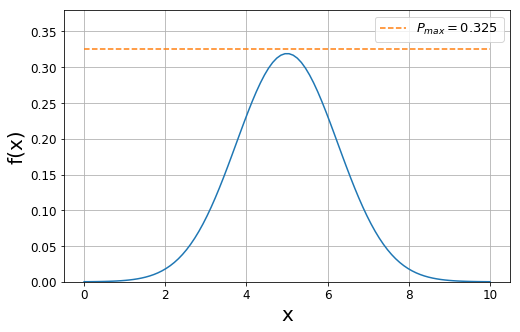

In [70]:
sd = 1.25
mean = 5
xmin = mean - 4*sd
xmax = mean + 4*sd

plt.figure(figsize=(8,5))
x = np.linspace(xmin, xmax, 100)

plt.plot(x, normal_distribution(x, mean, sd))
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
#plt.title('Normal distribution', fontsize=20)

Pmax = 0.325

plt.plot(x, np.ones(100)*Pmax, '--',label='$P_{max}=0.325$')
plt.legend(loc=1, fontsize=13)
plt.ylim(0,0.38)
plt.grid('on')
plt.tick_params(labelsize=12)

30.515772999999996


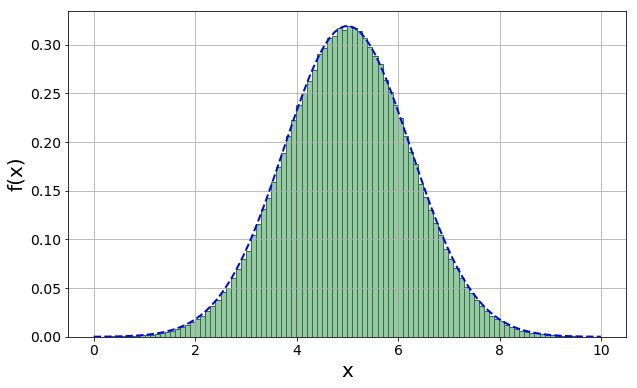

In [69]:
sd = 1.25
mean = 5
xmin = mean - 4*sd
xmax = mean + 4*sd
Pmax = 0.325

xvals = []

start = time.clock()

xvals.append(accept_reject(normal_distribution, xmin, xmax, args=(5, 1.23), Pmax=Pmax, accept_count=0, total_count=0))

for n in range(10**6-1):
    xvals.append(accept_reject(normal_distribution, xmin, xmax, args=(5, 1.23), Pmax=Pmax))
    
stop = time.clock()

print(stop-start)

plt.figure(figsize=(10,6))

my_histogram(xvals, 100, normal_distribution, args=(mean, sd))

sd = 1.25
mean = 5
xmin = mean - 4*sd
xmax = mean + 4*sd

x = np.linspace(xmin, xmax, 100)

plt.plot(x, normal_distribution(x, mean, sd), 'b--', linewidth=2)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
#plt.title('Normal distribution \n Samples generated using accept/reject', fontsize=25)
plt.grid('on')
plt.tick_params(labelsize=14);

In [68]:
print(accept_reject.accept_count, ' accepted draws and ', accept_reject.total_count-accept_reject.accept_count, 
      ' rejected draws. There was a ', accept_reject.accept_count/accept_reject.total_count*100, 
      '% acceptance rate observed.', sep='')

%timeit np.random.rand()

1000000 accepted draws and 2250043 rejected draws. There was a 30.768823674025235% acceptance rate observed.
823 ns ± 334 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Draw 10 uniformly distributed random numbers and add them to generate a new random number. Repeat the experiment $10^4$ times and plot the resulting distribution in the figure above.

In [180]:
def sum_uniform(xmin, xmax):
    x = np.random.uniform(xmin, xmax, 10)
    
    return np.sum(x)

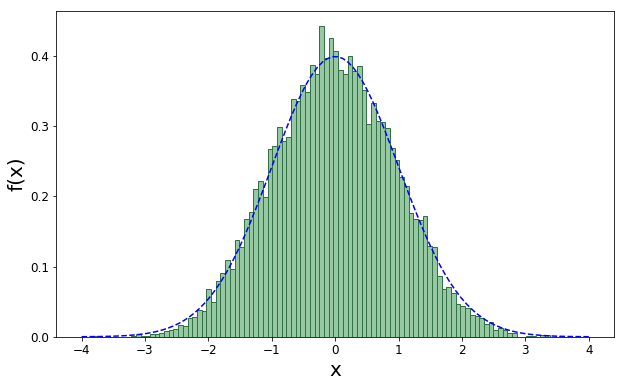

In [181]:
sd = 1
mean = 0
xmin = mean - 4*sd
xmax = mean + 4*sd
print()
xvals = []

for n in range(10**4):
    xvals.append(sum_uniform(xmin, xmax))
    
xvals=np.array(xvals)

plt.figure(figsize=(10,6))
plt.hist(xvals/7.5, bins=100, normed=True, facecolor='#96C8A2', edgecolor='#337147');
#my_histogram(xvals, 1000, normal_distribution, args=(0,1))

x = np.linspace(xmin, xmax, 100)

plt.plot(x, normal_distribution(x, mean, sd), 'b--')
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
#plt.title('Normal distribution \n Samples generated using summation', fontsize=15)
plt.tick_params(labelsize=12);

### 1.3 PDFs and CDFs

The time to conduct a routine maintenence check on a machine has a CDF given in the table below

| t, in minutes           | 0.0 | 5.0  | 10.0 | 15.0 | 20.0 | 25.0 | 30.0 |
|-------------------------|-----|------|------|------|------|------|------|
| CDF, fraction completed | 0.0 | 0.03 | 0.08 | 0.21 | 0.38 | 0.8  | 0.9  |

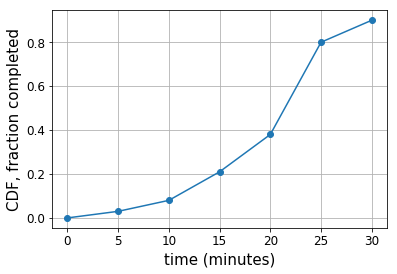

In [3]:
t = np.array([0,5,10,15,20,25,30])
CDF = np.array([0,0.03, 0.08, 0.21, 0.38,0.8,0.9])

plt.plot(t, CDF, 'o-')
plt.grid('on')
plt.xlabel('time (minutes)', fontsize=15)
plt.ylabel('CDF, fraction completed', fontsize=15);
plt.tick_params(labelsize=12);


What fraction of maintainance checks are completed in 15 minutes or less?

In [151]:
print('21% of maintenance checks are completed in 15 minutes or less')

21% of maintenance checks are completed in 15 minutes or less


What fraction of maintainence checks take longer than 30 minutes?

In [164]:
print('10% of maintenance checks take longer than 30 minutes')

10% of maintenance checks take longer than 30 minutes


What fraction takes between 10 and 15 minutes?

In [193]:
print(21-8,'% of maintenance checks take between 10 and 15 minutes', sep='')

13% of maintenance checks take between 10 and 15 minutes


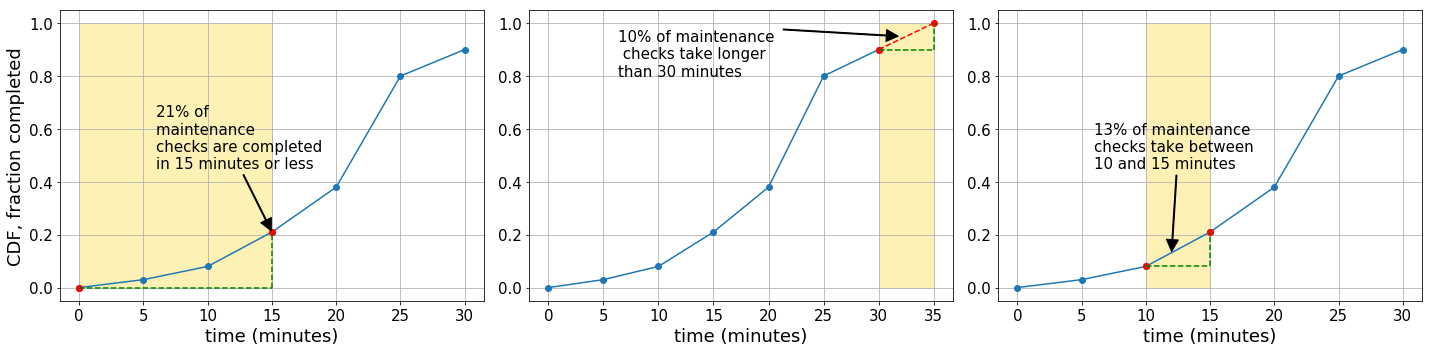

In [23]:
f, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].fill_between(np.linspace(0,15,10),0,1, color='#FEF1B5')
ax[0].plot(t, CDF, 'o-')
ax[0].plot([t[0],t[3]], [CDF[0],CDF[3]], 'ro')
ax[0].plot(np.linspace(0,15,10), np.zeros(10), 'g--')
ax[0].plot(np.ones(10)*15, np.linspace(0,0.21,10), 'g--')
ax[0].grid('on')
ax[0].set_xlabel('time (minutes)', fontsize=18)
ax[0].set_ylabel('CDF, fraction completed', fontsize=18);
ax[0].tick_params(labelsize=15);
ax[0].annotate('21% of \nmaintenance \nchecks are completed \nin 15 minutes or less',xytext=(6, 0.45),
               xy=(15, 0.21), fontsize=15, arrowprops=dict(facecolor='black', shrink=0.02, width=1))


ax[1].fill_between(np.linspace(30,35,10),0,1, color='#FEF1B5')
ax[1].plot(t, CDF, 'o-')
ax[1].plot([30,35], [0.9,1], 'ro--')
ax[1].plot(np.linspace(30,35,10), np.ones(10)*0.9, 'g--')
ax[1].plot(np.ones(10)*35, np.linspace(0.9,1,10), 'g--')
ax[1].grid('on')
ax[1].set_xlabel('time (minutes)', fontsize=18)
#ax[1].set_ylabel('CDF, fraction completed', fontsize=18);
ax[1].tick_params(labelsize=15)
ax[1].annotate('10% of maintenance \n checks take longer \nthan 30 minutes',xytext=(6.3, 0.8),
               xy=(32, 0.95), fontsize=15, arrowprops=dict(facecolor='black', shrink=0.02, width=1))


ax[2].fill_between(np.linspace(10,15,10),0,1, color='#FEF1B5')
ax[2].plot(t, CDF, 'o-')
ax[2].plot(t[2:4], CDF[2:4], 'ro')
ax[2].plot(np.linspace(10,15,10), np.ones(10)*0.08, 'g--')
ax[2].plot(np.ones(10)*15, np.linspace(0.08,0.21,10), 'g--')
ax[2].set_xlabel('time (minutes)', fontsize=18)
#ax[2].set_ylabel('CDF, fraction completed', fontsize=18);
ax[2].grid('on')
ax[2].tick_params(labelsize=15)
ax[2].annotate('13% of maintenance \nchecks take between \n10 and 15 minutes',xytext=(6, 0.45),
               xy=(12, 0.13), fontsize=15, arrowprops=dict(facecolor='black', shrink=0.02, width=1))
plt.tight_layout()
plt.show()

## 2 Markov Chain

Analytically find the limiting distribution of the walker's state

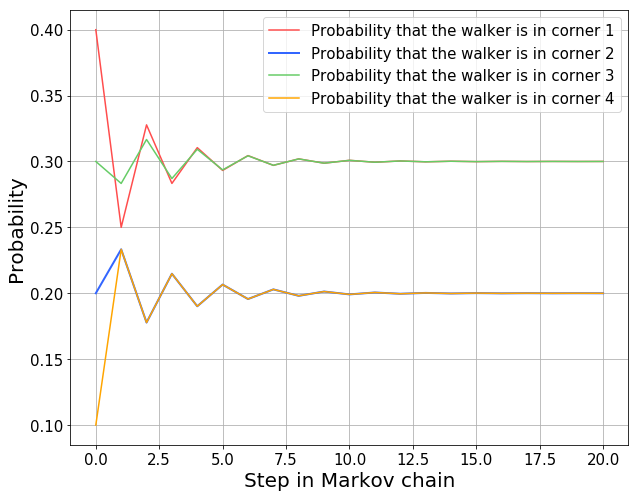

In [124]:
P = np.array([[0,1/3,1/3,1/3],[1/2,0,1/2,0],[1/3,1/3,0,1/3],[1/2,0,1/2,0]])
x = np.array([0.4,0.2,0.3,0.1])

c1 = []
c2 = []
c3 = []
c4 = []
c1.append(x[0])
c2.append(x[1])
c3.append(x[2])
c4.append(x[3])


for n in range(20):
    
    x = np.dot(x,P)

    c1.append(x[0])
    c2.append(x[1])
    c3.append(x[2])
    c4.append(x[3])
 
plt.figure(figsize=(10,8))
plt.plot(c1, label = 'Probability that the walker is in corner 1', color = '#ff4d4d')
plt.plot(c2, label = 'Probability that the walker is in corner 2', color = '#3366ff', linewidth=2)
plt.plot(c3, label = 'Probability that the walker is in corner 3', color='#66cc66')
plt.plot(c4, label = 'Probability that the walker is in corner 4', color='#FFA500')
plt.grid('on')
plt.xlabel('Step in Markov chain', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(loc=1, fontsize=15);
    

Compute this result by directly simulating the Markov chain for each corner. Take 550 draws of the chain for each case and discard the first 50 results (the "burn-in" period). Plot your results in a four panel figure and for each panel show the theoretical stational probability. 

In [72]:
def random_walk_chain(initial_position, numDraws):
    
    positions ={1:[2,3,4], 2:[1,3], 3:[4,1,2], 4:[1,3]}
    
    current_position = initial_position
    
    count = {1:0, 2:0, 3:0, 4:0}

    chain = []
    
    for n in range(numDraws):
        
        current_position = np.random.choice(positions[current_position])
        
        if n>50:
            chain.append(current_position)
            count[current_position] +=1
            
    return chain, count

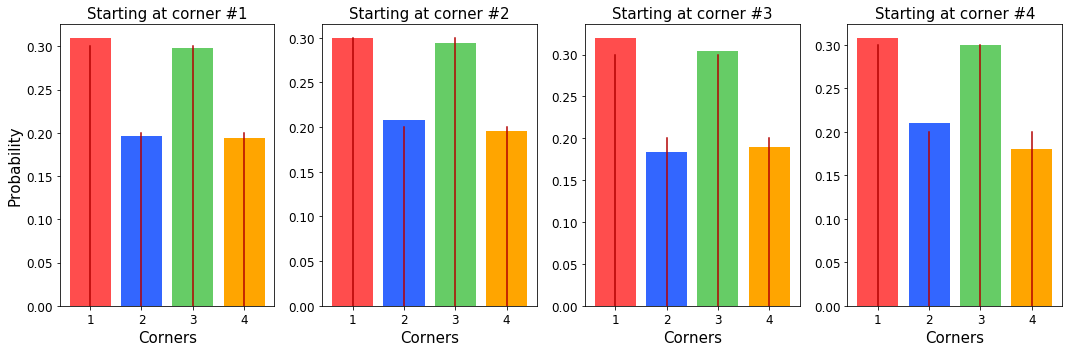

In [126]:
f, ax = plt.subplots(1,4, figsize=(15,5))

numDraws = 550
actualCounted = numDraws-50
predictions = (0.3,0.2,0.3,0.2)

ax[0].set_ylabel('Probability', fontsize=15)

for n in range(1,5):
    
    chain, count = random_walk_chain(n,numDraws)
    
    ax[n-1].set_title('Starting at corner #' + str(n), fontsize=15)
    ax[n-1].bar(1,count[1]/actualCounted, color = '#ff4d4d')
    ax[n-1].bar(2,count[2]/actualCounted, color = '#3366ff')
    ax[n-1].bar(3,count[3]/actualCounted, color='#66cc66')
    ax[n-1].bar(4,count[4]/actualCounted, color='#FFA500')
    
    ax[n-1].plot(np.ones(10)*1, np.linspace(0,predictions[0],10), '-', color = '#b30000')
    ax[n-1].plot(np.ones(10)*2, np.linspace(0,predictions[1],10), '-', color = '#b30000')
    ax[n-1].plot(np.ones(10)*3, np.linspace(0,predictions[2],10), '-', color = '#b30000')
    ax[n-1].plot(np.ones(10)*4, np.linspace(0,predictions[3],10), '-', color = '#b30000')
    
    ax[n-1].set_xlabel('Corners', fontsize=15)
    
    #ax[n-1].set_title('The probability the walker is in\n each corner during the random walk')
    ax[n-1].tick_params(labelsize=12);
plt.tight_layout()


### 2.2 Markov Processes in Business

A company is considering using Markov theory to analyze brand switching between three different brands of phones. Survey data has been gathered and has been used to estimate the transition matrix $P$ below.

In [17]:
P = np.array([[0.8,0.1,0.1],[0.03,0.95,0.02], [0.2,0.05,0.75]])

The current (month 1) market shares are (0.45,0.23,0.3) for brands 1, 2, and 3 respectivly. What will be the expected market shares after two months have elapsed?

In [136]:
month1 = np.array([0.45,0.25,0.3])


month2 = np.dot(month1,P)
print('Month 2 = ',month2, '\n')

month3 = np.dot(month2,P)
print('Month 3 = ',month3)

1.0
Month 2 =  [ 0.4275  0.2975  0.275 ] 

Month 3 =  [ 0.405925  0.339125  0.25495 ]


What is the long-run prediction for the expected market share for each of the three brands?

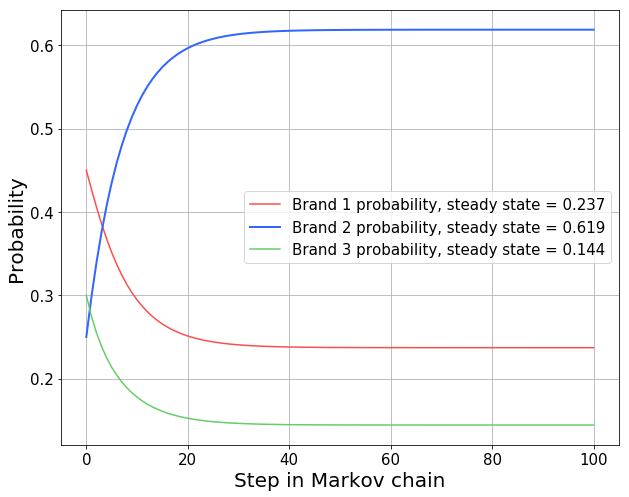

In [141]:
P = np.array([[0.8,0.1,0.1],[0.03,0.95,0.02], [0.2,0.05,0.75]])
x = np.array([0.45,0.25,0.30])

c1 = []
c2 = []
c3 = []

c1.append(x[0])
c2.append(x[1])
c3.append(x[2])

for n in range(100):
    
    x = np.dot(x,P)
    c1.append(x[0])
    c2.append(x[1])
    c3.append(x[2])
 
plt.figure(figsize=(10,8))
plt.plot(c1, label = 'Brand 1 probability, steady state = {:0.3f}'.format(c1[-1]), color = '#ff4d4d')
plt.plot(c2, label = 'Brand 2 probability, steady state = {:0.3f}'.format(c2[-1]), color = '#3366ff', linewidth=2)
plt.plot(c3, label = 'Brand 3 probability, steady state = {:0.3f}'.format(c3[-1]), color='#66cc66')
plt.grid('on')
plt.xlabel('Step in Markov chain', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(loc=5, fontsize=15);
    

## 3 Markov Chain Monte Carlo

Write code to simulate a "random-walk" Metropolis algorithm for a distribution $\omega = \exp(-2x^2)$. 

In [143]:
def w(x):
    
    return np.exp(-0.2*x*x)

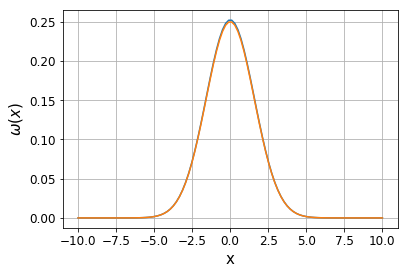

In [144]:
x = np.linspace(-10,10,100)


sd = np.sqrt(2.5)
mean = 0
xmin = mean - 4*sd
xmax = mean + 4*sd

plt.plot(x, normal_distribution(x, mean, sd))
plt.plot(x, w(x)/4)
#plt.plot(x, normal_distribution(x, 0, np.sqrt(2.5)))
plt.ylabel('$\omega(x)$', fontsize=15)
plt.xlabel('x', fontsize=15)

plt.grid('on')
plt.tick_params(labelsize=12);

In [148]:
def RWM_point(xn, delta, prob, count):
    
    delta_n = np.random.uniform(-delta, delta)
    
    xt = xn + delta_n

    omega = prob(xt)/prob(xn)
    
    if omega >= 1:
  
        return xt, count+1
    
    else:
        r = np.random.rand()
        
        if r < omega:

            return xt, count+1
        
        else:
  
            return xn, count
    

In [149]:
def RWM_chain(x0, delta, prob, numiter):

    xvals = [x0]

    count = 0

    value = x0
    for n in range(numiter):

        value, count = RWM_point(value, delta, prob, count)
        xvals.append(value)

    acceptance = count/numiter
    mean = np.abs(np.mean(xvals))
    
    return xvals, mean, acceptance
    

In [207]:
delta = np.linspace(0.5,10,11)

print(' -------------------------')
print('| delta\t| acceptance  rate|')
print(' -------------------------')
for d in delta:
    xvals, mean, acceptance = RWM_chain(0, d, w, 10000)
    print('|{:6.3f}\t|     {:0.4f}      |'.format(d, acceptance))
print(' -------------------------')

 -------------------------
| delta	| acceptance  rate|
 -------------------------
| 0.500	|     0.9400      |
| 1.450	|     0.8205      |
| 2.400	|     0.7165      |
| 3.350	|     0.6124      |
| 4.300	|     0.5288      |
| 5.250	|     0.4539      |
| 6.200	|     0.3973      |
| 7.150	|     0.3510      |
| 8.100	|     0.3116      |
| 9.050	|     0.2879      |
|10.000	|     0.2529      |
 -------------------------


Run your code for $x_0=1$

(i) How many trials were necessary before the desired distribution is reached? In other words, how does the mean value $\bar{x}$ evolve with the number of MCMC steps?

In [163]:
numiter = [n for n in range(100,50000,100)]

MCMC_time_list = []
MCMC_mean_list = []

for n in numiter:
    start = time.clock()
    xvals, mean, acceptance = RWM_chain(0, 6.2, w, n)
    stop = time.clock()
    
    MCMC_mean_list.append(mean)
    
    MCMC_time_list.append(stop-start)

In [172]:
len(MCMC_mean_list)

499

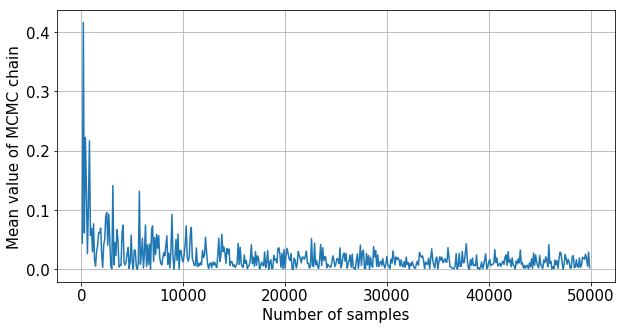

In [173]:
plt.figure(figsize=(10,5))
plt.plot(numiter, MCMC_mean_list)
plt.grid('on')
plt.xlabel('Number of samples', fontsize=15)
plt.ylabel('Mean value of MCMC chain', fontsize=15);
plt.tick_params(labelsize=15);

(ii) For 5000 trials, plot your results as a histogram.

The acceptance rate was: 0.3966


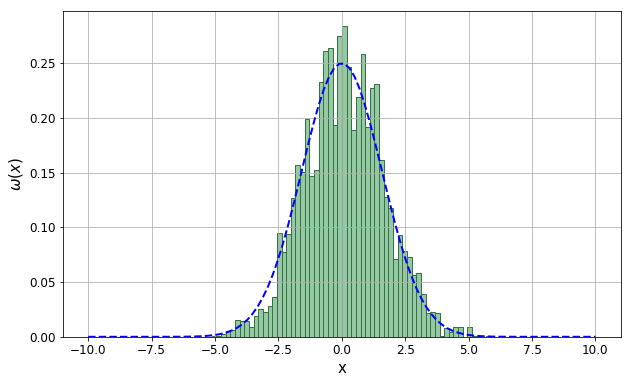

In [178]:
xvals, mean, acceptance = RWM_chain(0, 6.2, w, 5000)
print('The acceptance rate was:',acceptance)
plt.figure(figsize=(10,6))
plt.grid('on')
plt.plot(x, w(x)/4, 'b--', linewidth=2)
plt.hist(xvals,bins=60, normed=True, facecolor='#96C8A2', edgecolor='#337147');
plt.ylabel('$\omega(x)$', fontsize=15)
plt.xlabel('x', fontsize=15)
#plt.title('Samples generated using 5000 trials of "random-walk" Metropolis algorithm', fontsize=15);
plt.tick_params(labelsize=12);

The acceptance rate was: 0.4058


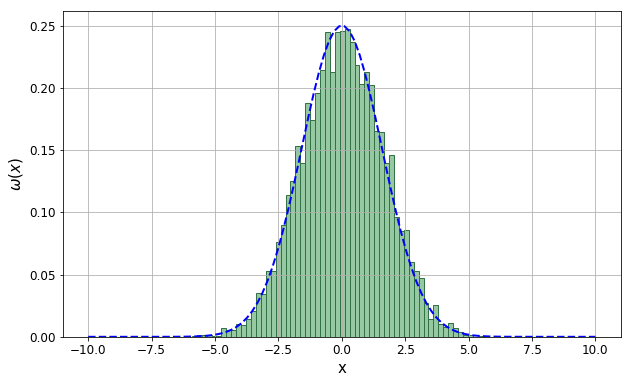

In [175]:
xvals, mean, acceptance = RWM_chain(0, 6.2, w, 15000)
print('The acceptance rate was:',acceptance)
plt.figure(figsize=(10,6))
plt.grid('on')
plt.plot(x, w(x)/4, 'b--', linewidth=2)
plt.hist(xvals,bins=60, normed=True, facecolor='#96C8A2', edgecolor='#337147');
plt.ylabel('$\omega(x)$', fontsize=15)
plt.xlabel('x', fontsize=15)
#plt.title('Samples generated using 25000 trials of "random-walk" Metropolis algorithm', fontsize=15);
plt.tick_params(labelsize=12);

(iii) Compare the speed of the direct MC method and the Random-Walk Metropolis

In [169]:
DMC_numiter = [n for n in range(10,10000,100)]

DMC_time_list = []
DMC_mean_list = []

sd = np.sqrt(2.5)
mean = 0
xmin = mean - 4*sd
xmax = mean + 4*sd

for n in DMC_numiter:
    xvals = []
    
    start = time.clock()
    for m in range(n):
        xvals.append((accept_reject(normal_distribution, xmin, xmax, args=(mean, sd), Pmax=1)))
    stop = time.clock()
    
    DMC_mean_list.append(np.abs(np.mean(xvals)))
    DMC_time_list.append(stop-start)

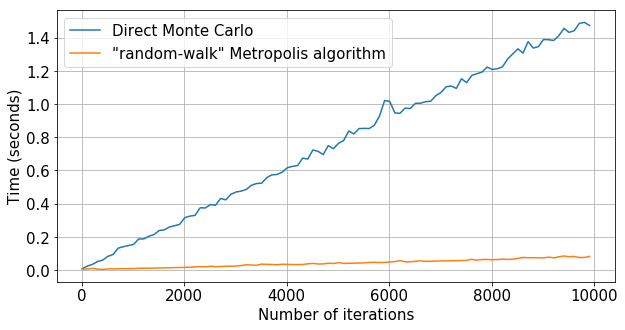

In [174]:
plt.figure(figsize=(10,5))
plt.plot(DMC_numiter, DMC_time_list, label='Direct Monte Carlo');
plt.plot(DMC_numiter, MCMC_time_list[0:100], label = '"random-walk" Metropolis algorithm');
plt.xlabel('Number of iterations', fontsize=15)
plt.grid('on')
plt.legend(loc='best', fontsize=15)
plt.ylabel('Time (seconds)', fontsize=15);
plt.tick_params(labelsize=15);

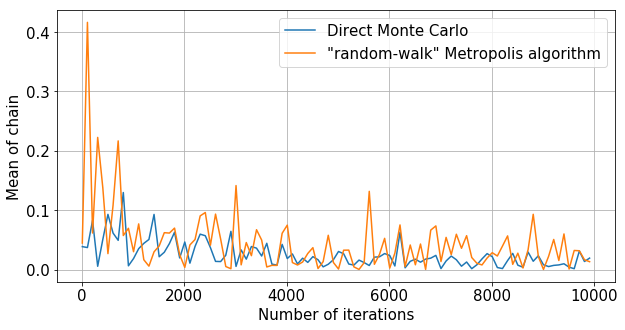

In [171]:
plt.figure(figsize=(10,5))
plt.plot(DMC_numiter, DMC_mean_list, label='Direct Monte Carlo');
plt.plot(DMC_numiter, MCMC_mean_list[0:100], label = '"random-walk" Metropolis algorithm');
plt.xlabel('Number of iterations', fontsize=15)
plt.grid('on')
plt.legend(loc='best', fontsize=15)
plt.ylabel('Mean of chain', fontsize=15);
plt.tick_params(labelsize=15);

### 3.2 The Metropolis Hastings Algorithm: Poorly-mixed and well-mixed chains

Let us consider the PDF:
$$P(x) = C x^{-5/2}e^{-2/x}$$

In [248]:
def PDF32(x):
    
    return x**(-5/2)*np.exp(-2/x)

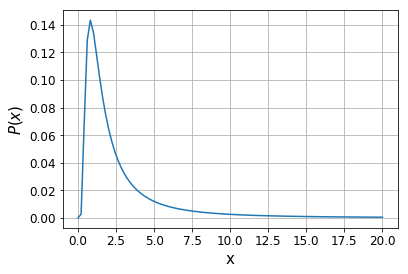

In [113]:
x = np.linspace(0.0001,20,100)

plt.plot(x, PDF32(x))

plt.grid('on')
plt.xlabel('x', fontsize=15)
plt.ylabel('$P(x)$', fontsize=15)
plt.tick_params(labelsize=12);

For a symmetric proposal distribution, let us take $x_0=1$ as our starting value and suppose the proposal distribution returns a candidate value of $x*=39.82$. Write down the acceptance probability and give its numerical value. Is the new candidate likely or unlikely to be accepted?

In [114]:
x0=1
xstar = 39.82

print('The acceptance probability is:',PDF32(39.82)/PDF32(1))

The acceptance probability is: 0.000702300443244


Now take $x_0=1$ again as the starting value and plot the resulting first 500 values for x for the following proposal distributions.

*Hint: For these proposal distributions, do not generate a new test point but rather generate test points by adding a random number to the current point.*

A uniform distribution in $(0,100)$.

In [249]:
def MH_point(xn, prob_p, prob_q, proposal_distribution, count, args = None):

    delta = 0
    
    if args is None:
        delta = proposal_distribution()
    else:
        delta = proposal_distribution(*args)

    xtry = delta

    ratio = prob_p(xtry)*prob_q(xn)/(prob_p(xn)*prob_q(xtry))
    #print(prob_q(xn), prob_q(xtry),prob_q(xn)/prob_q(xtry) )
    alpha = np.min((1 , ratio))
    #print(ratio, alpha)
    u = np.random.rand()
    
    if u < alpha:
        return xtry, count+1
    else:
        return xn, count
        

In [210]:
def uniform(x):
    return 1

In [250]:
def MH_chain(x0, numiter, prob_p, prob_q, proposal_distribution, args = None):

    value = x0
    count = 0
    
    xvals = []
    
    for n in range(numiter):
        value, count = MH_point(value, prob_p, prob_q, proposal_distribution, count, args)
        xvals.append(value)
        
    acceptance = count/numiter
    
    return xvals, acceptance

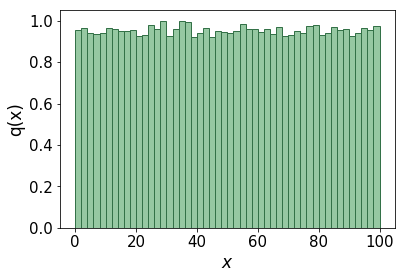

In [219]:
x_vals = []

for n in range(100000):
    
    x_vals.append(np.random.uniform(0,100))
    
my_histogram(x_vals ,50, uniform)
plt.xlabel('$x$', fontsize=17)
plt.ylabel('q(x)', fontsize=17)
plt.tick_params(labelsize=15);

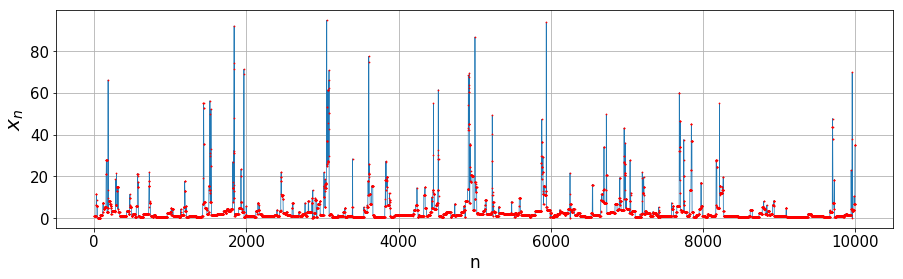

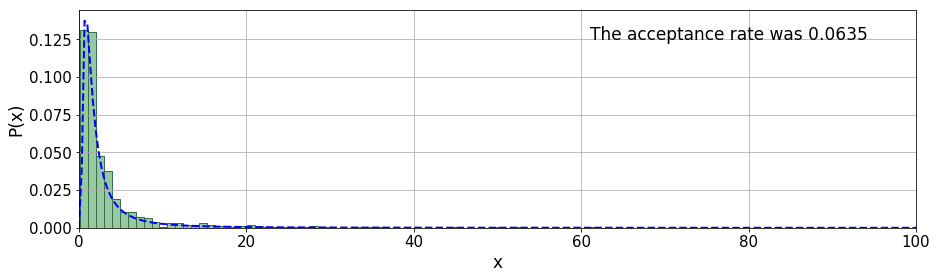

The acceptance rate was: 0.0635


In [232]:
xvals, acceptance = MH_chain(1, 10000, PDF32, uniform, np.random.uniform, args=(0,100))

plt.figure(figsize=(15,4))
plt.plot(xvals, 'o-', linewidth=0.75, markersize=0.75, markerfacecolor='red', markeredgecolor='red')
plt.grid('on')
plt.xlabel('n', fontsize=17)
plt.ylabel('$x_n$', fontsize=20)
plt.tick_params(labelsize=15);
plt.show()

plt.figure(figsize=(15,4))
#plt.hist(xvals, bins=100, normed=True, facecolor='#96C8A2', edgecolor='#337147');
x = np.linspace(0.0001,100,300)

my_histogram(xvals ,100, PDF32)
plt.grid('on')
plt.xlabel('x', fontsize=17)
plt.ylabel('P(x)', fontsize=17)
plt.tick_params(labelsize=15);
plt.plot(x, PDF32(x), 'b--', linewidth=2)
plt.xlim(0,100)
plt.annotate('The acceptance rate was {:0.4f}'.format(acceptance), xy=(61, 0.125), fontsize=17)
plt.show();

x = np.linspace(0.0001,20,100)
print('The acceptance rate was:',acceptance)

A $\chi^2$ distribution

In [251]:
def gamma(z):
    
    integrand = lambda x: x**z * np.exp(-x)
    
    return integrate.quad(integrand, 0, np.infty)[0]
    

In [252]:
g12 = gamma(1/2)

denominator = g12*2**(1/2)
print(denominator)

1.253314137316707


In [253]:
def chi_squared(x, denominator = 1.253314137316707):
    
    numerator = x**(-0.5)*np.exp(-x/2)

    return numerator/denominator

In [238]:
xvals = []
for m in range(10000):
    xvals.append((accept_reject(chi_squared, 0, 0.5, Pmax=100)))

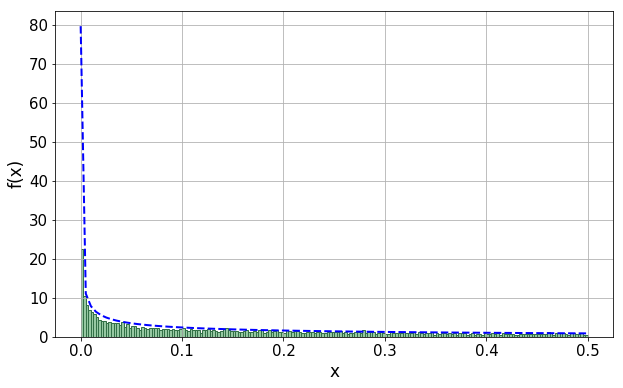

In [254]:
x = np.linspace(0.0001,0.5,100)
plt.figure(figsize=(10,6))
plt.plot(x, chi_squared(x), 'b--', linewidth=2)
#plt.hist(xvals,bins=500, normed=True, facecolor='#96C8A2', edgecolor='#337147');
my_histogram(xvals, 200, chi_squared)
plt.xlabel('x', fontsize=17)
plt.ylabel('f(x)', fontsize=17)
plt.tick_params(labelsize=15);
plt.grid('on')

In [259]:
def get_chi_squared_point():
    return accept_reject(chi_squared, 0, 0.5, Pmax=100, total_count=0, accept_count=0)

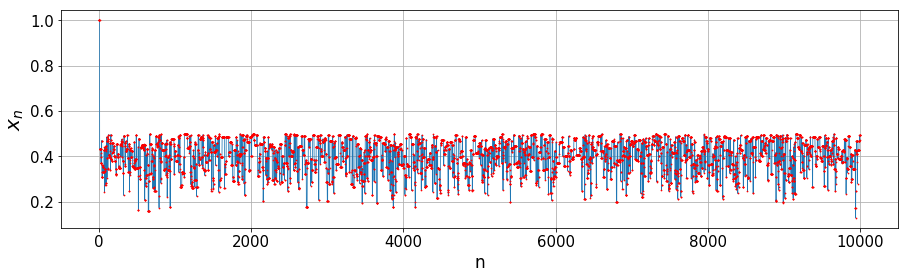

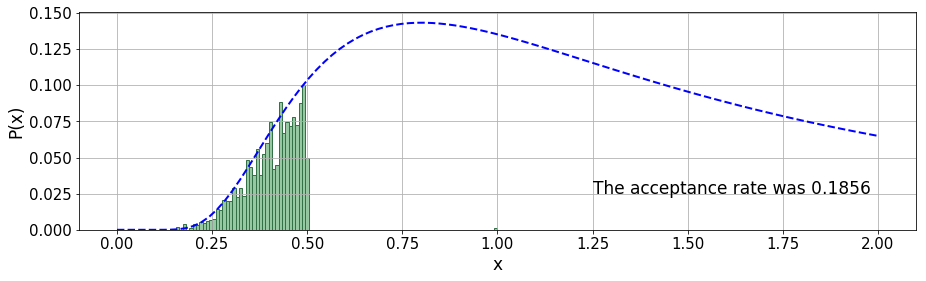

The acceptance rate was: 0.1856


In [262]:
xvals, acceptance = MH_chain(1, 10000, PDF32, chi_squared , get_chi_squared_point)

plt.figure(figsize=(15,4))
plt.plot(xvals, 'o-', linewidth=0.75, markersize=0.75, markerfacecolor='red', markeredgecolor='red')
plt.grid('on')
plt.xlabel('n', fontsize=17)
plt.ylabel('$x_n$', fontsize=20)
plt.tick_params(labelsize=15);
plt.show()

plt.figure(figsize=(15,4))
my_histogram(xvals ,100, PDF32)

x = np.linspace(0.0001,2,100)
plt.grid('on')
plt.xlabel('x', fontsize=17)
plt.ylabel('P(x)', fontsize=17)
plt.tick_params(labelsize=15);
plt.annotate('The acceptance rate was {:0.4f}'.format(acceptance), xy=(1.25, 0.025), fontsize=17)
plt.plot(x, PDF32(x), 'b--', linewidth=2)

plt.show();

print('The acceptance rate was:',acceptance)